In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm

import os
import pickle
import neurokit2 as nk
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
with open('df_sep.pkl', 'rb') as f:
    df = pickle.load(f)

In [41]:
with open('df.pkl', 'rb') as f:
    dff = pickle.load(f)

In [12]:
def rr_interval(ecg):
    
    """This function takes ECG and returns RR intervals"""
    
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
    rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
    time_diff = []
    for i in range(len(info['ECG_R_Peaks'])):
        if i == len(info['ECG_R_Peaks'])-1:
            break
        else:
            time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])
    return time_diff, info

In [4]:
def get_plots(df):
    for i in range(len(df)):
        ecg = df["ECG"][i]
        ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
        rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
        hrv_features = nk.hrv_time(rpeaks)
        mean_baseline = hrv_features['HRV_MeanNN'][0]
        print(df['block'][i], 'Mean : ',mean_baseline)
        test = rr_interval(df["ECG"][i])
        plt.plot(test)
        plt.title(df['block'][i])
        plt.ylim(100,300)
        plt.savefig("plots/{}.png".format(df['block'][i]), dpi = 300)
        plt.close()

In [44]:
df = df.drop('PPG_differential', axis = 1)

In [57]:
names = []
for name in df['Name']:
    names.append(name[3:8])
    
unique_names = np.unique(names, axis=0)

In [60]:
unique_names

array(['AlsGA', 'AmrVV', 'AntAA', 'AntEG', 'AntMI', 'AsiDI', 'BabYV',
       'BarEA', 'BarSR', 'BurAV', 'ButAS', 'DavAS', 'DoiNA', 'EgoAP',
       'ElcRD', 'FedYA', 'GaiMR', 'GalSK', 'GeiEA', 'GibGR', 'GlaNA',
       'GulAS', 'IboSN', 'IotMY', 'IvaVV', 'KalEY', 'KirDA', 'KorMN',
       'KosPV', 'KozVA', 'KruIA', 'KudDY', 'KulDS', 'KulSS', 'LeoAD',
       'LodAV', 'MarOV', 'MarYA', 'MasAV', 'MazAA', 'MilSG', 'MitDG',
       'MitVG', 'NekAK', 'NemMS', 'NikAO', 'PavMA', 'PavSO', 'PorGV',
       'ProNI', 'RosSM', 'SarMA', 'SidFA', 'SmiYO', 'SneOP', 'SteDI',
       'SteKO', 'StePI', 'SteVR', 'StoIA', 'SubAA', 'SyaEG', 'TihYA',
       'TimSD', 'TimYE', 'TolDI', 'TroAA', 'TseSA', 'TumNY', 'UskDA',
       'UskNA', 'VolAR', 'ZelAS', 'ZolAI'], dtype='<U5')

In [65]:
df

,Name,block,group,ECG,SGR,PPG,length
0,74_AmrVV_baseline.txt,baseline,Control,"[-0.018, -0.01975, -0.02025, -0.01675, -0.017,...","[-0.19989, -0.19989, -0.198364, -0.198364, -0....","[0.974375, 0.95875, 0.941875, 0.924375, 0.9043...",30176
1,74_AmrVV_block1.txt,block1_level1,Control,"[-0.179, -0.17725, -0.18375, -0.18425, -0.1777...","[-0.19989, -0.19989, -0.201416, -0.201416, -0....","[-0.27625, -0.26125, -0.243125, -0.2225, -0.2,...",21281
2,74_AmrVV_block1.txt,block1_level2,Control,"[-0.06925, -0.06725, -0.068, -0.0715, -0.07175...","[-0.254822, -0.253296, -0.253296, -0.25177, -0...","[0.019375, 0.010625, 0.003125, -0.00375, -0.01...",21281
3,74_AmrVV_block1.txt,block1_level3,Control,"[0.05925, 0.0535, 0.041, 0.04625, 0.0565, 0.04...","[-0.268555, -0.268555, -0.267029, -0.265503, -...","[0.125, 0.125, 0.125, 0.124375, 0.124375, 0.12...",21281
4,74_AmrVV_block1.txt,block1_level4,Control,"[0.073, 0.069, 0.0655, 0.07025, 0.0735, 0.072,...","[-0.00152588, -0.00152588, -0.00152588, -0.001...","[-0.526875, -0.521875, -0.5175, -0.51375, -0.5...",21281
...,...,...,...,...,...,...,...
1481,73_AntEG_block3.txt,block3_level3,Wrong_feedback,"[-0.01875, -0.00575, -0.0125, -0.03425, -0.033...","[0.175476, 0.175476, 0.177002, 0.177002, 0.177...","[0.17125, 0.16375, 0.15625, 0.149375, 0.14375,...",17659
1482,73_AntEG_block3.txt,block3_level4,Wrong_feedback,"[-0.03225, -0.031, -0.0395, -0.049, -0.04575, ...","[-0.492859, -0.494385, -0.495911, -0.498962, -...","[0.495625, 0.503125, 0.51, 0.51625, 0.5225, 0....",17659
1483,73_AntEG_block3.txt,block3_level5,Wrong_feedback,"[-0.0405, -0.05125, -0.06775, -0.068, -0.04625...","[-1.22223, -1.22528, -1.22833, -1.22986, -1.23...","[1.23125, 1.22813, 1.22438, 1.22, 1.215, 1.209...",17659
1484,73_AntEG_block3.txt,block3_level6,Wrong_feedback,"[-0.05475, -0.069, -0.07225, -0.082, -0.09075,...","[-1.64032, -1.6449, -1.64948, -1.65405, -1.658...","[-0.59375, -0.605625, -0.616875, -0.6275, -0.6...",17659


In [61]:
def divide_chunks(l, n):
     
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [74]:
def separate_for_seconds(df, ticks):
    new_df = pd.DataFrame(columns = df.columns)
    
    for i in range(len(df)):
        if df['block'][i] == 'baseline':
            row = {'Name' : df['Name'][i],
                   'block' : df['block'][i],
                   'group' : df['group'][i],
                   'ECG' : df['ECG'][i],
                   'SGR' : df['SGR'][i],
                   'PPG' : df['PPG'][i],
                   'length' : df['length'][i]}
            new_df = new_df.append(row, ignore_index = True)
        else:
            ECG_batches = list(divide_chunks(df['ECG'][i],ticks))
            SGR_batches = list(divide_chunks(df['SGR'][i],ticks))
            PPG_batches = list(divide_chunks(df['PPG'][i],ticks))
            
            ECG_batches = [x for x in ECG_batches if len(x) >= 250]
            SGR_batches = [x for x in SGR_batches if len(x) >= 250]
            PPG_batches = [x for x in PPG_batches if len(x) >= 250]
            
            k = 0 #batch number
            
            for ecg_batch, sgr_batch, ppg_batch in zip(ECG_batches, SGR_batches, PPG_batches):
                row = {'Name' : df['Name'][i],
                   'block' : '{}_batch{}'.format(df['block'][i],k),
                   'group' : df['group'][i],
                   'ECG' : ecg_batch,
                   'SGR' : sgr_batch,
                   'PPG' : ppg_batch,
                   'length' : len(ecg_batch)}
                new_df = new_df.append(row, ignore_index = True)
                k+=1
    return new_df
            
            
            

In [82]:
def separate(df,unique_names):
    output = pd.DataFrame()
    for name in unique_names:
        tmp = df[df['Name'].str.contains(name)]
        tmp = tmp.reset_index(drop = True)
        tmp_out = separate_for_seconds(tmp,1250)
        output = output.append(tmp_out, ignore_index = True)
    return output 

In [83]:
df_new = separate(df,unique_names)

In [88]:
df_new

,Name,block,group,ECG,SGR,PPG,length
0,12_AlsGA_baseline.txt,baseline,Wrong_feedback,"[-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...","[0.605774, 0.610352, 0.614929, 0.621033, 0.625...","[2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...",30235
1,12_AlsGA_block1.txt,block1_level1_batch0,Wrong_feedback,"[-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...","[1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...","[1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....",1250
2,12_AlsGA_block1.txt,block1_level1_batch1,Wrong_feedback,"[-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...","[4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...","[1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...",1250
3,12_AlsGA_block1.txt,block1_level1_batch2,Wrong_feedback,"[-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...","[-0.0778198, -0.0808716, -0.0839233, -0.085449...","[0.89125, 0.876875, 0.86375, 0.853125, 0.84562...",1250
4,12_AlsGA_block1.txt,block1_level1_batch3,Wrong_feedback,"[-0.02475, -0.0375, -0.03275, -0.02725, -0.037...","[-0.552368, -0.553894, -0.556946, -0.559998, -...","[0.666875, 0.661875, 0.6575, 0.653125, 0.64937...",1250
...,...,...,...,...,...,...,...
21552,59_ZolAI_training.txt,training_batch14,Wrong_feedback,"[-0.08975, -0.106, -0.11325, -0.09675, -0.074,...","[0.675964, 0.665283, 0.656128, 0.646973, 0.636...","[-0.508125, -0.5125, -0.5175, -0.52125, -0.524...",1250
21553,59_ZolAI_training.txt,training_batch15,Wrong_feedback,"[-0.0275, -0.00925, -0.0165, -0.02125, -0.0157...","[-0.790405, -0.782776, -0.775146, -0.765991, -...","[0.39375, 0.388125, 0.38125, 0.374375, 0.3675,...",1250
21554,59_ZolAI_training.txt,training_batch16,Wrong_feedback,"[0.0345, 0.04575, 0.08625, 0.08125, 0.055, 0.0...","[1.7746, 1.78528, 1.79443, 1.80511, 1.8158, 1....","[-0.3675, -0.37625, -0.384375, -0.39125, -0.39...",1250
21555,59_ZolAI_training.txt,training_batch17,Wrong_feedback,"[-0.01725, -0.035, -0.07475, -0.08825, -0.0695...","[0.67749, 0.665283, 0.654602, 0.642395, 0.6317...","[0.138125, 0.1675, 0.19375, 0.2175, 0.23875, 0...",1250


In [90]:
df_new[df_new['Name'].str.contains('AlsGA')]

,Name,block,group,ECG,SGR,PPG,length
0,12_AlsGA_baseline.txt,baseline,Wrong_feedback,"[-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...","[0.605774, 0.610352, 0.614929, 0.621033, 0.625...","[2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...",30235
1,12_AlsGA_block1.txt,block1_level1_batch0,Wrong_feedback,"[-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...","[1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...","[1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....",1250
2,12_AlsGA_block1.txt,block1_level1_batch1,Wrong_feedback,"[-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...","[4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...","[1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...",1250
3,12_AlsGA_block1.txt,block1_level1_batch2,Wrong_feedback,"[-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...","[-0.0778198, -0.0808716, -0.0839233, -0.085449...","[0.89125, 0.876875, 0.86375, 0.853125, 0.84562...",1250
4,12_AlsGA_block1.txt,block1_level1_batch3,Wrong_feedback,"[-0.02475, -0.0375, -0.03275, -0.02725, -0.037...","[-0.552368, -0.553894, -0.556946, -0.559998, -...","[0.666875, 0.661875, 0.6575, 0.653125, 0.64937...",1250
...,...,...,...,...,...,...,...
297,12_AlsGA_training.txt,training_batch14,Wrong_feedback,"[-0.0485, -0.04775, -0.0555, -0.047, -0.0375, ...","[0.444031, 0.439453, 0.434875, 0.430298, 0.425...","[1.765, 1.70188, 1.63875, 1.575, 1.51125, 1.44...",1250
298,12_AlsGA_training.txt,training_batch15,Wrong_feedback,"[0.02275, 0.025, 0.01525, 0.0005, 0.00325, 0.0...","[-0.662231, -0.663757, -0.666809, -0.668335, -...","[-0.096875, -0.140625, -0.184375, -0.226875, -...",1250
299,12_AlsGA_training.txt,training_batch16,Wrong_feedback,"[0.121, 0.1335, 0.149, 0.165, 0.1675, 0.153, 0...","[0.369263, 0.369263, 0.370789, 0.370789, 0.370...","[-1.96438, -1.97687, -1.98563, -1.99, -1.98687...",1250
300,12_AlsGA_training.txt,training_batch17,Wrong_feedback,"[-0.00875, 0.00025, -0.02025, -0.03, -0.01375,...","[1.04523, 1.06812, 1.091, 1.11389, 1.13678, 1....","[0.589375, 0.5925, 0.595625, 0.598125, 0.59937...",1250


In [ ]:
def med_feature_extraction(df, unique_names):
    output = pd.DataFrame(columns = ['HRV', 'HR', 'AMP_pwave', 'SGR',])
    for name in unique_names:
        tmp = df[df['Name'].str.contains(name)]
        tmp = tmp.reset_index(drop = True)
        
        

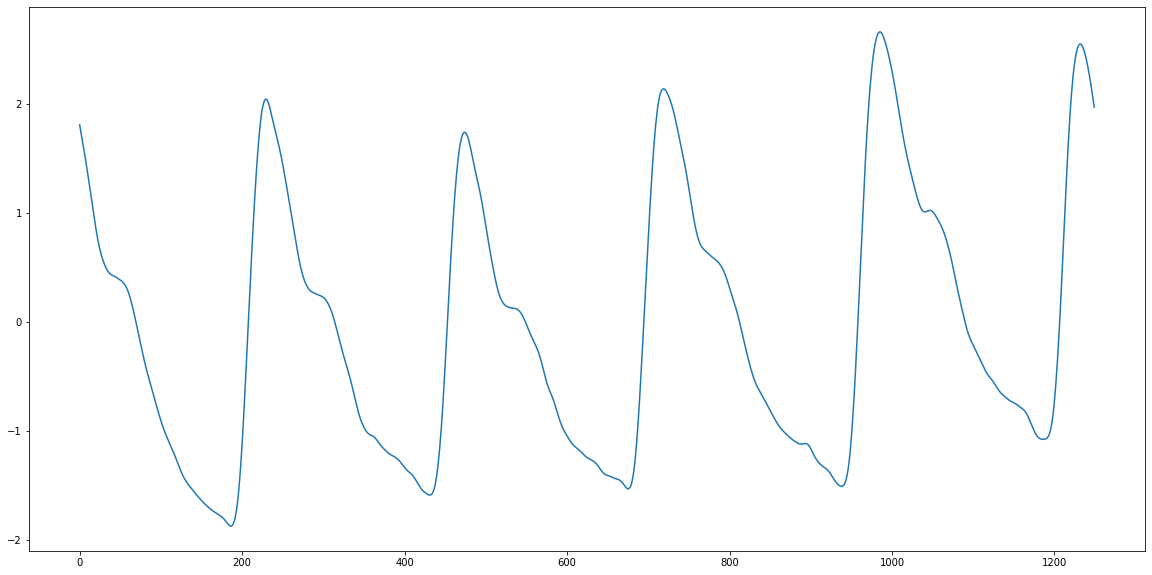

In [91]:
plt.plot(df_new['PPG'][1])

In [102]:
signals, info = nk.ppg_process(df_new['PPG'][0], sampling_rate=250)

In [99]:
info

{'PPG_Peaks': array([230, 474, 719, 985]), 'sampling_rate': 250}

In [104]:
test = []
for i in range(len(info['PPG_Peaks'])):
    if i == len(info['PPG_Peaks'])-1:
        break
    else:
        test.append(info['PPG_Peaks'][i+1] - info['PPG_Peaks'][i])

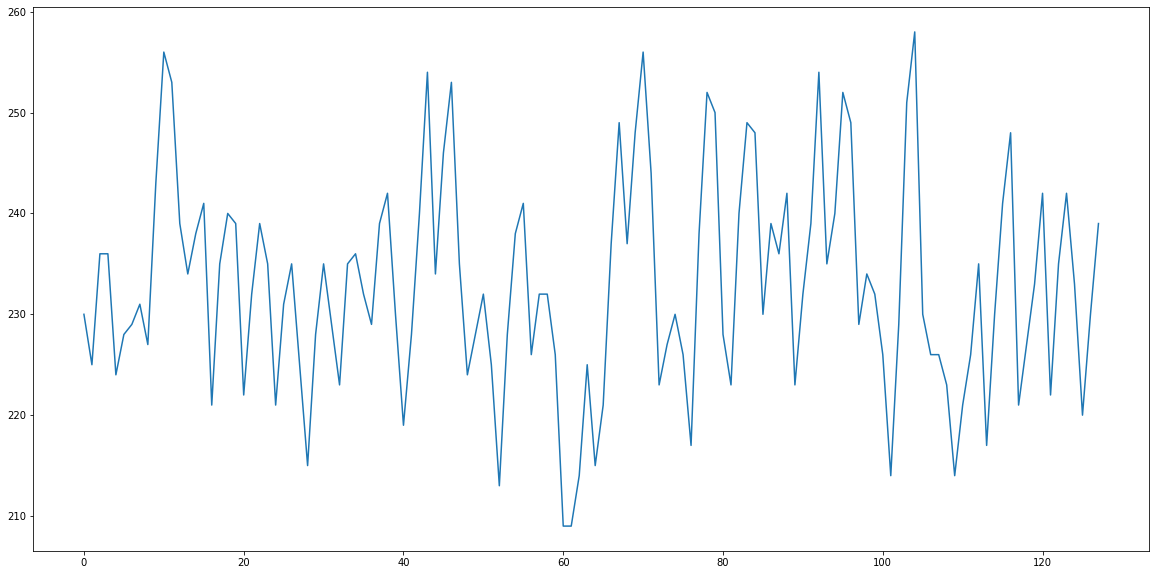

In [105]:
plt.plot(test)

In [106]:
analyze_df = nk.ppg_analyze(signals, sampling_rate=250)
analyze_df

c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,64.416475,931.625,42.706654,NaN,NaN,NaN,NaN,NaN,NaN,44.873225,...,1.616082,5.072202,1.523205,1.333617,1.36874,1.769995,1.895984,1.91159,4.476419,1.039062


In [101]:
for i in range(len(info['PPG_Peaks'])):
    if i == len(info['PPG_Peaks'])-1:
        break
    else:
        print(info['PPG_Peaks'][i+1] - info['PPG_Peaks'][i])

244
245
266


In [97]:
frequency = []
k = 0
for i in range(len(signals)):
    if signals['PPG_Peaks'][i] == 1:
        frequency.append(k)
        k = 0
    else:
        k+=1
        

In [98]:
frequency

[230, 243, 244, 265]

In [ ]:
def ppg_frequency(ppg):
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
    rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
    time_diff = []
    for i in range(len(info['ECG_R_Peaks'])):
        if i == len(info['ECG_R_Peaks'])-1:
            break
        else:
            time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])

In [13]:
ecg = tmp["ECG"][0]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')
hrv_features = nk.hrv_time(signals['ECG_R_Peaks'])
mean_baseline = hrv_features['HRV_MeanNN'][0]
std_baseline = hrv_features['HRV_SDNN'][0]

In [ ]:
nk.ecg_intervalrelated(epochs)

In [14]:
print(mean_baseline)
print(std_baseline)

175.12280701754386
9.853163437260251


In [24]:
ecg1 = tmp["ECG"][1]
ecg_cleaned1 = nk.ecg_clean(ecg1, sampling_rate=250)
rr_intervals, info = rr_interval(ecg_cleaned1[1250:2500])

In [25]:
info

{'ECG_R_Peaks': array([ 103,  255,  412,  570,  725,  880, 1030, 1170]),
 'sampling_rate': 250}

In [26]:
rr_intervals

[152, 157, 158, 155, 155, 150, 140]

In [27]:
threshold_down = mean_baseline * 0.8
print(threshold_down)
threshold_up = mean_baseline * 1.2
print(threshold_up)

140.0982456140351
210.14736842105262


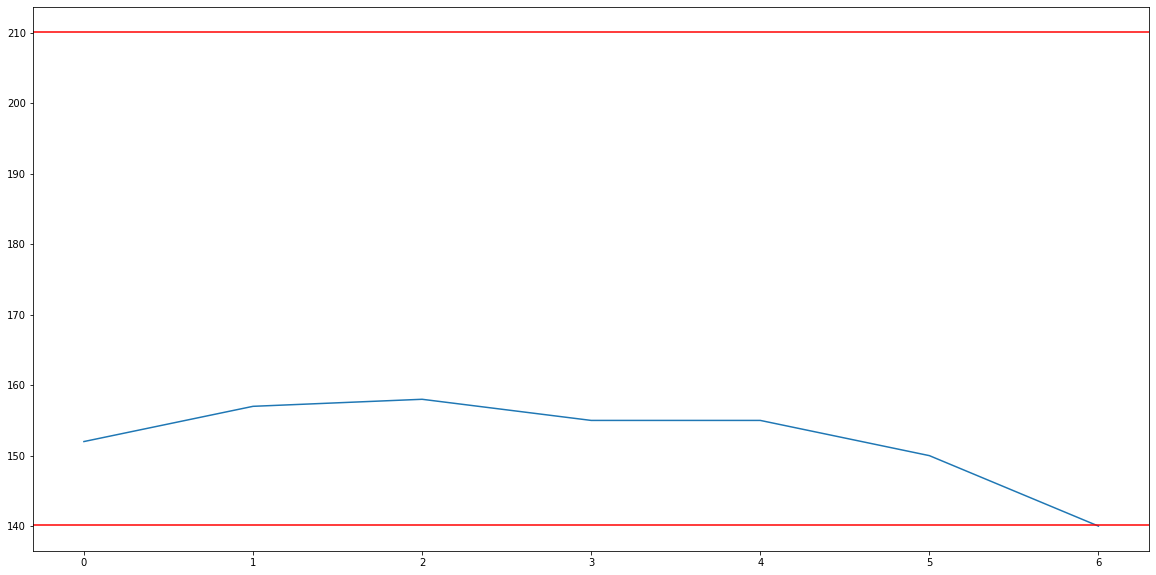

In [28]:
plt.plot(rr_intervals)
plt.axhline(y=threshold_down, color='r')
plt.axhline(y=threshold_up, color='r')

In [29]:
for i in range(len(rr_intervals)):
    if rr_intervals[i] < threshold_down:
        print('HRV decrease detected in {} RR interval'.format(i))
    elif rr_intervals[i] > threshold_up:
        print('HRV increase detected in {} RR interval'.format(i))
    else:
        print('Nothing')

Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 6 RR interval


In [32]:
info['ECG_R_Peaks'][6]

1030